# Numerical Methods <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Coursework-Q1---Implement-RK2-family" data-toc-modified-id="Coursework-Q1---Implement-RK2-family-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Coursework Q1 - Implement RK2 family</a></span></li><li><span><a href="#Coursework-Q2---Implementing-backward-Euler-using-a-nonlinear-system-solver" data-toc-modified-id="Coursework-Q2---Implementing-backward-Euler-using-a-nonlinear-system-solver-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Coursework Q2 - Implementing backward Euler using a nonlinear system solver</a></span></li><li><span><a href="#Coursework-Q3---Steady-state-advection-diffusion-with-the-FEM" data-toc-modified-id="Coursework-Q3---Steady-state-advection-diffusion-with-the-FEM-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Coursework Q3 - Steady-state advection-diffusion with the FEM</a></span></li><li><span><a href="#Coursework-Q4---Time-dependent-advection-diffusion-with-the-FEM" data-toc-modified-id="Coursework-Q4---Time-dependent-advection-diffusion-with-the-FEM-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Coursework Q4 - Time-dependent advection-diffusion with the FEM</a></span></li></ul></div>

In [163]:
%matplotlib inline
! pip install mpltools
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as sl
import scipy.sparse as sp
import scipy.sparse.linalg as spla
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# as we're in 2D we will be doing some 3D plotting
from mpl_toolkits.mplot3d import Axes3D
# and using some colormaps
from matplotlib import cm
# and we will create some animations!
import matplotlib.animation as animation
from IPython.display import HTML
from pprint import pprint

# font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Coursework Q1 - Implement RK2 family

Write a function that implements the RK2 family of methods which takes in the free parameter $\alpha$ that appears in the most general definition of RK2.

For example the first line of your function might read

```Python
def RK2_alpha(f, y0, t0, t_max, dt, alpha=0.5):
```

where `f` is a function of time and the solution $y$.

<br>

Perform some verification tests of your function to confirm that with the choice $\alpha=1$ your implementation agrees with results from the improved Euler method which was implemented in lecture 5. 

<br>

In [185]:
def RK2_alpha(f, y0, t0, t_max, dt, alpha):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        """ The general RK2 family schemes in lecture 6
        """
        k1 = f(t, y)
        k2 = f(t + alpha*dt, y + alpha*dt*k1)
        y = y + (1 - 1/(2*alpha))*dt*k1 + (1/(2*alpha))*dt*k2
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)
    
def improved_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        ye = y + dt*f(t, y)  # euler guess
        y = y + 0.5*dt* ( f(t, y) + f(t + dt, ye) )
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)

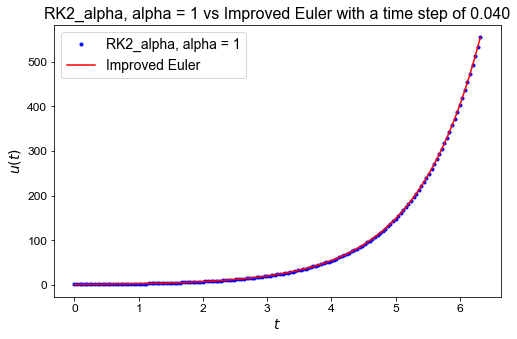

In [186]:
# TEST 1
def f1(t, y):
    val = y
    return val

# problem parameters
dt = 0.04
y0 = 1.0
t0 = 0.0
alpha = 1
t_max = 2*np.pi

# set up figure
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))

yall, tall = RK2_alpha(f1, y0, t0, t_max, dt, alpha)
ax1.plot(tall, yall, 'b.', label='RK2_alpha, alpha = 1')

yall, tall = improved_euler(f1, y0, t0, t_max, dt)
ax1.plot(tall, yall, 'r', label='Improved Euler')

# ax1.plot(tall, np.exp(tall), 'k--', label='Exact')
ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$u(t)$', fontsize=14)
ax1.set_title('RK2_alpha, alpha = 1 vs Improved Euler with a time step of {0:.3f}'.format(dt), fontsize=16)
ax1.legend(loc='best', fontsize=14)

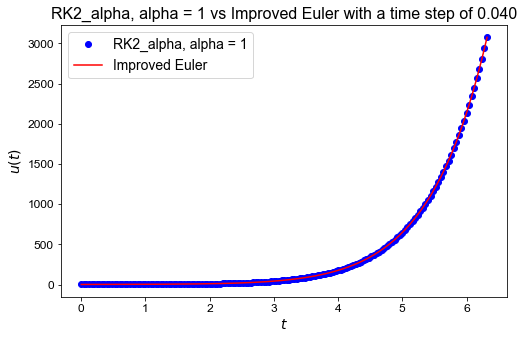

In [187]:
# TEST 2
def f2(t, y):
    return 7*np.exp(t) - t**3 -3*t**2 - 6*t -6

# problem parameters
dt = 0.04
y0 = 1.0
t0 = 0.0
alpha = 1
t_max = 2*np.pi

# set up figure
fig, ax1 = plt.subplots(1, 1, figsize=(8, 5))

yall, tall = RK2_alpha(f2, y0, t0, t_max, dt, alpha)
ax1.plot(tall, yall, 'ob', label='RK2_alpha, alpha = 1')

yall, tall = improved_euler(f2, y0, t0, t_max, dt)
ax1.plot(tall, yall, 'r', label='Improved Euler')

# ax1.plot(tall, np.exp(tall), 'k--', label='Exact')
ax1.set_xlabel('$t$', fontsize=14)
ax1.set_ylabel('$u(t)$', fontsize=14)
ax1.set_title('RK2_alpha, alpha = 1 vs Improved Euler with a time step of {0:.3f}'.format(dt), fontsize=16)
ax1.legend(loc='best', fontsize=14)

***Comments: According to the two figures shown above, the graph of Improved Euler and RK2 coincide perfectly when $\alpha$ is set to be 1. Therefore, my implementation obtained above agrees with results from the Improved Euler in lecture 5.***

<br>

Test for convergence using several different values of $\alpha$ using the test problem with RHS and exact solutions given by the test case we saw in lecture 6:

$$ y' = y + t^3, \;\;\;\;\;\; y(0) = 1, $$  

which has the exact solution

$$ y(t) = 7\text{e}^t - t^3 - 3t^2 - 6t - 6. $$

You may make use of the following functions implementing these:

```python
def f(t, y):
    return y + t**3

def y_ex(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6
```

<br>

Consider a simple error metric given by the error in the solution at time $t=3$.

<br>

Plot your convergence results, compared with results from the forward Euler and the improved Euler methods, and add to the graph your estimates for the order of convergence of each method.

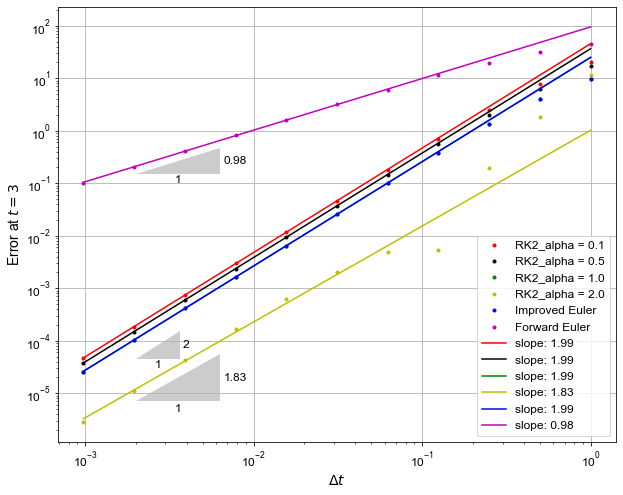

In [188]:
# second part of Q1
# problem parameters
dt = 0.04
y0 = 1.0
t0 = 0.0
t_max = 2*np.pi

def f(t, y):
    return y + t**3

def y_ex(t):
    return 7*np.exp(t) - t**3 - 3*t**2 - 6*t - 6

def forward_euler(f, y0, t0, t_max, dt):
    y = np.array(y0)
    t = np.array(t0)
    y_all = [y0]
    t_all = [t0]
    while t < t_max:
        y = y + dt*f(t, y)  # euler guess
        y_all.append(y)
        t = t + dt
        t_all.append(t)
    return np.array(y_all), np.array(t_all)


def approx_error(dt, t_max):
    yall, tall = RK2_alpha(f, y0, t0, t_max, dt, alpha = 0.1)
    err1 = abs(yall[-1]-y_ex(t_max))
    yall, tall = RK2_alpha(f, y0, t0, t_max, dt, alpha = 0.5)
    err2 = abs(yall[-1]-y_ex(t_max))
    yall, tall = RK2_alpha(f, y0, t0, t_max, dt, alpha = 1.0)
    err3 = abs(yall[-1]-y_ex(t_max))
    yall, tall = RK2_alpha(f, y0, t0, t_max, dt, alpha = 2.0)
    err4 = abs(yall[-1]-y_ex(t_max))
    yall, tall = improved_euler(f, y0, t0, t_max, dt)
    err5 = abs(yall[-1]-y_ex(t_max))
    yall, tall = forward_euler(f, y0, t0, t_max, dt)
    err6 = abs(yall[-1]-y_ex(t_max))
    return err1, err2, err3, err4, err5, err6


error_RK2_01 = []
error_RK2_05 = []
error_RK2_10 = []
error_RK2_20 = []
error_ie = []
error_fe = []
dt_array = []
dt = 1.

while dt > 5.e-4:
    dt_array.append(dt)
    err1, err2, err3, err4, err5, err6= approx_error(dt, 3)
    error_RK2_01.append(err1)
    error_RK2_05.append(err2)
    error_RK2_10.append(err3)
    error_RK2_20.append(err4)
    error_ie.append(err5)
    error_fe.append(err6)
    dt *= 0.5
    
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))
ax1.loglog(dt_array, error_RK2_01, 'r.', label='RK2_alpha = 0.1')
ax1.loglog(dt_array, error_RK2_05, 'k.', label='RK2_alpha = 0.5')
ax1.loglog(dt_array, error_RK2_10, 'g.', label='RK2_alpha = 1.0')
ax1.loglog(dt_array, error_RK2_20, 'y.', label='RK2_alpha = 2.0')
ax1.loglog(dt_array, error_ie, 'b.', label='Improved Euler')
ax1.loglog(dt_array, error_fe, 'm.', label='Forward Euler')
ax1.set_xlabel('$\Delta t$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.grid(True)

# use numpy.polyfit to find best fit linear line to data

linefit_error_RK2_01 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_RK2_01[start_fit:]), 1)
linefit_error_RK2_05 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_RK2_05[start_fit:]), 1)
linefit_error_RK2_10 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_RK2_10[start_fit:]), 1)
linefit_error_RK2_20 = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_RK2_20[start_fit:]), 1)
linefit_ie = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_ie[start_fit:]), 1)
linefit_fe = np.polyfit(np.log(dt_array[start_fit:]), np.log(error_fe[start_fit:]), 1)

ax1.loglog(dt_array, np.exp(linefit_error_RK2_01[1]) * dt_array**(linefit_error_RK2_01[0]), 'r-', label = 'slope: {:.2f}'.format(linefit_error_RK2_01[0]))
ax1.loglog(dt_array, np.exp(linefit_error_RK2_05[1]) * dt_array**(linefit_error_RK2_05[0]), 'k-', label = 'slope: {:.2f}'.format(linefit_error_RK2_05[0]))
ax1.loglog(dt_array, np.exp(linefit_error_RK2_10[1]) * dt_array**(linefit_error_RK2_10[0]), 'g-', label = 'slope: {:.2f}'.format(linefit_error_RK2_10[0]))
ax1.loglog(dt_array, np.exp(linefit_error_RK2_20[1]) * dt_array**(linefit_error_RK2_20[0]), 'y-', label = 'slope: {:.2f}'.format(linefit_error_RK2_20[0]))
ax1.loglog(dt_array, np.exp(linefit_ie[1]) * dt_array**(linefit_ie[0]), 'b-', label = 'slope: {:.2f}'.format(linefit_ie[0]))
ax1.loglog(dt_array, np.exp(linefit_fe[1]) * dt_array**(linefit_fe[0]), 'm-', label = 'slope: {:.2f}'.format(linefit_fe[0]))

annotation.slope_marker((2e-3, 1.5e-1), (0.98, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)
annotation.slope_marker((2e-3, 4.5e-5), (2, 1), ax=ax1, size_frac=0.08, pad_frac=0.05)
annotation.slope_marker((2e-3, 7e-6), (1.83, 1), ax=ax1, size_frac=0.15, pad_frac=0.05)

ax1.legend(loc='best')

***Comments: As the figure shown above, the convergence results of forward Euler is lowest. However, the its error performance is worst compared to improved Euler and RK2 when selecting same time step size.***


***Furthermore, the error performance of RK2 becomes better as the value of $\alpha$ increases*** 

<br>

Also, for a fixed time step size, compute and plot how the error varies as a function of $\alpha$ for values in the range $[0.1,4.0]$.  

<br>

What is the optimal value of $\alpha$ which minimises the error for this problem?

The optimal value of alpha is 2.10 which minimises the error for this problem


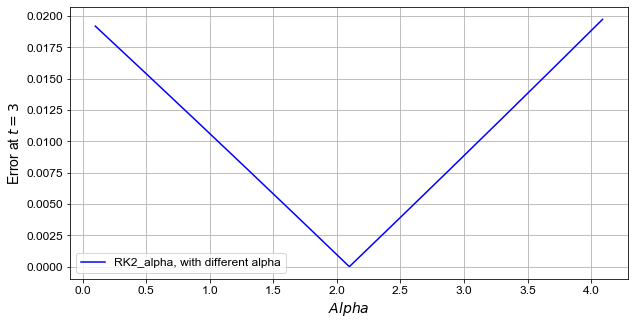

In [189]:
alphas = np.arange(0.1, 4.1, 0.01)
dt =0.02
t_max = 3
error_RK2 = []
for alpha in alphas:
    yall, tall = RK2_alpha(f, y0, t0, t_max, dt, alpha)
    error = abs(yall[-1] - y_ex(t_max))
    error_RK2.append(error)
fig, ax1 = plt.subplots(1, 1, figsize=(10, 5))
ax1.plot(alphas, error_RK2, 'b', label='RK2_alpha, with different alpha')
ax1.set_xlabel('$Alpha$', fontsize=14)
ax1.set_ylabel('Error at $t=3$', fontsize=14)
ax1.grid(True)


n = error_RK2.index(min(error_RK2))
op = 0.1 + 0.01 *n

print ('The optimal value of alpha is %.2f which minimises the error for this problem'%(op))

ax1.legend(loc='best')

# Coursework Q2 - Implementing backward Euler using a nonlinear system solver

In the lecture 5 homework (question "circular orbits") we considered the vector ODE problem

\begin{align*}
\dot{x} & = -y, \\[5pt] 
\dot{y} & = x
\end{align*} 

with initial conditions $x(0)=1,\; y(0)=0$.  

We saw in that homework question how the forward and improved Euler methods performed on this problem.

**Recall that the exact solution's trajectory in $(x,y)$ space should map out a circle, but forward Euler's orbit was found to rapidly increase in diameter.**

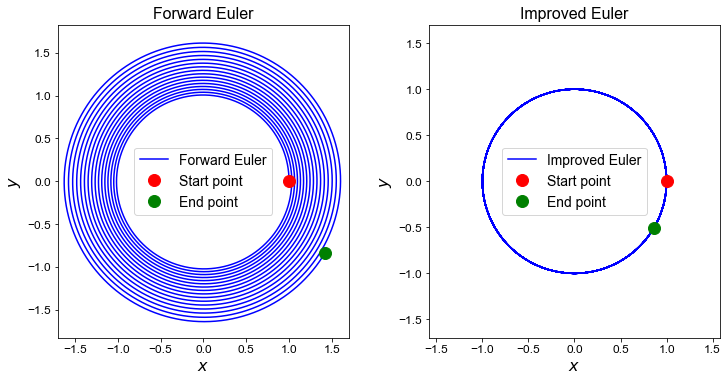

In [190]:
"""Solve circular orbits using forward Euler and Improved Euler in Lecture 5.
   And plot the result in (x,y) space
"""

def forward_euler(f, u0, t0, t_max, dt):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        u = u + dt*f(t, u)  # euler guess
        u_all.append(u)
        t = t + dt
        t_all.append(t)
        
    return np.array(u_all), np.array(t_all)


def improved_euler(f, u0, t0, t_max, dt):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < t_max:
        ue = u + dt*f(t, u)  # euler guess
        u = u + 0.5*dt* ( f(t, u) + f(t + dt, ue) )
        u_all.append(u)
        t = t + dt
        t_all.append(t)
    return np.array(u_all), np.array(t_all)

# define function provided by requirements
def f(t, u): 
    f = np.zeros_like(u)
    f[0] = -u[1]
    f[1] =  u[0]   
    return f

# problem parameters
dt = 0.01
u0 = np.array([1.,0.])
t0 = 0.0
tf = 100.

# set up figure
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(w_pad=4)

u, t = forward_euler(f, u0, t0, tf, dt)
ax1.plot(u[:,0], u[:,1], 'b', label='Forward Euler')
ax1.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax1.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Forward Euler', fontsize=16)
ax1.axis('equal')
ax1.legend(loc='best', fontsize=14)
ax1.set_xlim(-1.7,1.7)
ax1.set_ylim(-1.7,1.7)


u, t = improved_euler(f, u0, t0, tf, dt)
ax2.plot(u[:,0], u[:,1], 'b', label='Improved Euler')
ax2.plot(u[0,0], u[0,1], 'ro', label='Start point', markersize=12)
ax2.plot(u[-1,0], u[-1,1], 'go', label='End point', markersize=12)
ax2.set_xlabel('$x$', fontsize=16)
ax2.set_ylabel('$y$', fontsize=16)
ax2.set_title('Improved Euler', fontsize=16)
ax2.axis('equal')
ax2.legend(loc='best', fontsize=14)
ax2.set_xlim(-1.7,1.7)
ax2.set_ylim(-1.7,1.7);

<br> 

Write a function to implement the backward Euler scheme for a generic RHS vector function $\boldsymbol{f}$. 

To do this you will need to call a nonlinear system solver, make use of one of the ones that we saw in lecture 4.

<br>

Run your code for the above problem and comment on the qualitative differences between your solution obtained with backward Euler with that obtained using forward Euler.

<br>

**Answer: The backward Euler method computes the approximations using
$$ y_{n+1} = y_{n} + {\Delta t}\, {f}\left(t_{n+1}, y_{n+1}\right) \\[5pt]$$**

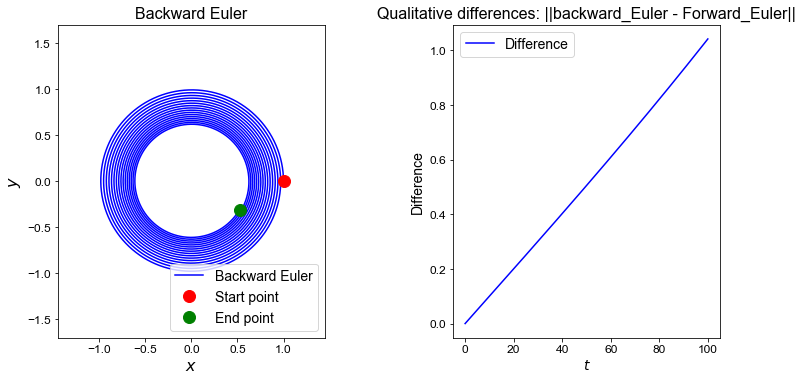

In [191]:
def jacobian(f, u, du):
    """ Compute the Jacobian matrix
    """
    J = np.zeros((len(u), len(u)))
    f0 = f(u)
    for j in range(len(u)):
        # always start from x
        u_inc = u.copy()
        # increment only the j-th entry by dx
        u_inc[j] +=  du
        # evaluate f at this incremented x
        f1 = f(u_inc)
        # numerical derivative, place the vector result 
        # in the appropriate column of J        
        J[:,j] = (f1 - f0)/du
    return J

def newton_system_numdif(f, u, h=1.0e-4, atol=1.0e-6, max_its=100):  
    """ Solve the problem f(x)=0 using a numerically computed Jacobian 
    with a step size of h, and use Scipy to solve the linear system
     J \Delta x = -f(x)   at each iteration
    """
    for it in range(max_its-1):
        J = jacobian(f, u, h)
        du = sl.solve(J, -f(u))
        u += du
        if sl.norm(du, np.inf) < atol:
            return u
    print('Hit max_its without converging')
    

def backward_euler_scheme(f, u0, t0, dt , tmax):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < tmax:
        t = t + dt
        t_all = np.append(t_all,t)
        u_guess = np.array([1.,2.]) #guess
        def F(u_guess):
            return u_guess - u - dt*f(t+dt,u_guess)
        u = newton_system_numdif(F, u_guess, h=1.0e-4, atol=1.0e-6, max_its=100)
        u_all = np.vstack([u_all, u])
    return np.array(u_all), np.array(t_all)

###test
def f(t, u): 
    f = np.zeros_like(u)
    f[0] = -u[1]
    f[1] =  u[0]   
    return f

dt = 0.01
u0 = np.array([1.,0.])
t0 = 0.0
t_max = 100.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.tight_layout(w_pad=8)
# fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
u_be, t_be = backward_euler_scheme(f, u0, t0,dt,t_max)

ax1.plot(u_be[:,0], u_be[:,1], 'b', label='Backward Euler')
ax1.plot(u_be[0,0], u_be[0,1], 'ro', label='Start point', markersize=12)
ax1.plot(u_be[-1,0], u_be[-1,1], 'go', label='End point', markersize=12)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Backward Euler', fontsize=16)
ax1.axis('equal')
ax1.legend(loc='best', fontsize=14)
ax1.set_xlim(-1.7,1.7)
ax1.set_ylim(-1.7,1.7);


u_f, t_f = forward_euler(f, u0, t0, t_max, dt)

ax2.plot(t_f, np.linalg.norm(u_be -u_f, axis=1), 'b', label='Difference')
ax2.set_xlabel('$t$', fontsize=14)
ax2.set_ylabel('Difference', fontsize=14)
ax2.set_title('Qualitative differences: ||backward_Euler - Forward_Euler||', fontsize=16)
ax2.legend(loc='best', fontsize=14);

**Comments: As figure shown in left, the backward Euler's orbit is similar to forward Euler's orbit. Both are found to rapidly increase in diameter but the backward Euler's orbit has opposite start point and end point compared with forward Euler's orbit.**

**Answer: As figure shown in right, the qualitative differences curve between backward and forward Euler is a linear function.**

Based on your observations implement another implicit two-level scheme which should provide qualitatively improved
results compared with both forward and backward Euler. 
<br>

**Answer: In this section, the implicit two-level scheme is implemented by the implicit midpoint rule:
\begin{align*}
{y_{n+1} - y_{n}} &= {\Delta t}\, {f}\left(  \frac{1}{2} (t_{n}+t_{n+1}),\frac{1}{2} (y_{n}+y_{n+1})\right) \\[5pt] 
\iff \;\;
{y_{n+1} } &= y_{n} + {\Delta t}\, {f}\left(t_{n}+ \frac{\Delta t}{2} , \frac{1}{2} (y_{n}+y_{n+1}) \right),
\end{align*}**

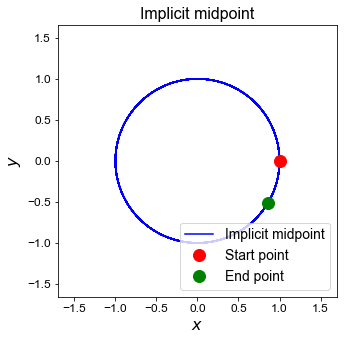

In [192]:
def implicit_midpoint(f, u0, t0, dt , tmax):
    u = np.array(u0)
    t = np.array(t0)
    u_all = [u0]
    t_all = [t0]
    while t < tmax:
        t = t + dt
        t_all = np.append(t_all,t)
        u_guess = np.array([1.,1.]) #guess
        def F(u_guess):
            return u_guess - u - dt*f(t + dt/2, (u+u_guess)/2)
        u = newton_system_numdif(F, u_guess, h=1.0e-4, atol=1.0e-6, max_its=100)
        u_all = np.vstack([u_all, u])
    return np.array(u_all), np.array(t_all)

#test
def f(t, u): 
    f = np.zeros_like(u)
    f[0] = -u[1]
    f[1] =  u[0]   
    return f

dt = 0.01
u0 = np.array([1.,0.])
t0 = 0.0
t_max = 100.

fig, ax1 = plt.subplots(1, 1, figsize=(5, 5))
u_im, t_im = implicit_midpoint(f, u0, t0, dt, t_max)
ax1.plot(u_im[:,0], u_im[:,1], 'b', label='Implicit midpoint')
ax1.plot(u_im[0,0], u_im[0,1], 'ro', label='Start point', markersize=12)
ax1.plot(u_im[-1,0], u_im[-1,1], 'go', label='End point', markersize=12)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$y$', fontsize=16)
ax1.set_title('Implicit midpoint', fontsize=16)
ax1.axis('equal')
ax1.legend(loc='lower right', fontsize=14)
ax1.set_xlim(-1.7,1.7)
ax1.set_ylim(-1.7,1.7);

Given that the exact solution maps out a circle, consider what mathematical conservation law (a function of the solution variables that should be constant) the solution should respect and check how well each of your methods performs at satisfying this law.

**Answer: Because the exact solution maps out a circle, the all solutions should respect the following mathematical conservation law  $$ r(t) := \sqrt{x(t)^2 + y(t)^2} = r(0), $$
in time.**

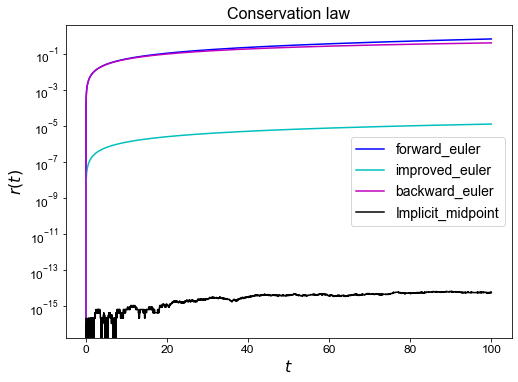

In [193]:
# set up figure
fig, ax1 = plt.subplots(1, 1, figsize=(7, 5))
fig.tight_layout(w_pad=4)
ax1.set_xlabel('$t$', fontsize=16)
ax1.set_ylabel('$r(t)$', fontsize=16)
ax1.set_title('Conservation law', fontsize=16)

def f(t, u): 
    f = np.zeros_like(u)
    f[0] = -u[1]
    f[1] =  u[0]   
    return f

u, t = forward_euler(f, u0, t0, tf, dt)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'b', label='forward_euler')

u, t = improved_euler(f, u0, t0, tf, dt)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'c', label='improved_euler')

u, t = backward_euler_scheme(f, u0, t0, dt, t_max)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'm', label='backward_euler')


u, t = implicit_midpoint(f, u0, t0, dt, t_max)
ax1.semilogy(t, np.abs(np.sqrt(u[:,0]**2 + u[:,1]**2) - np.sqrt(u[0,0]**2 + u[0,1]**2)), 'k', label='Implicit_midpoint')


ax1.legend(loc='best', fontsize=14);

**Comments: According to the 'conservation law' figure, the implicit midpoint rule is most appropriate to conservation law. Although this method keeps low error rate, it lacks stability when time is small. Moreover, the forward and backward Euler have similar performance on conservation law. Finally, the improved Euler has better performance to satisfy conservation law compared to the forward and backward Euler. Meanwhile, it still has well stability.**

# Coursework Q3 - Steady-state advection-diffusion with the FEM


In this part of the question we want to solve steady-state advection-diffusion using the (non-local-assembly based) finite element approach we developed in lecture 11.



Using the finite element method
formulate and solve the steady-state advection-diffusion (boundary value) problem with Dirichlet boundary conditions we considered in lecture 7 (the exact solution to which is given below).

The difference to what we've seen before in our FEM codes is that you now need to discretise the advection term, which ultimately involves integrating basis functions multiplied by their derivatives over elements.

[**Hint:** *your starting point for this might be the code we wrote in lecture 11 section 5.4 ("Dealing with more complex BCs (Inhomogeneous Dirichlet)"). You need to add in an extra contribution to the LHS corresponding to advection (cf. L11 homework 1.4 where we ended up adding a mass matrix when we solved the problem $u''+u=f$).  You will need to remember to also add in the appropriate extra advection related RHS terms corresponding to the boundary contributions (as was explained in the context of diffusion in section 5.4.2 of lecture 11).*]

<br>

Verify your implementation with a convergence with $\Delta x$ analysis using the exact solution given by
```Python
def u_exact(x):
    return CE * (np.exp(Pe * x / L) - 1) / (np.exp(Pe) - 1)
```
You can use the following parameters (using the notation of lecture 7)
```Python
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa / L
CE = 1
```
where `CE` is the Dirichlet BC value at the right hand boundary, the left hand boundary being a homogeneous Dirichlet condition.



<br>

Do you observe the expected order of convergence?

<br>

Finally, compare the errors in your solution against a corresponding finite difference solver. You may re-use code from lecture 7 for this. What do you observe?

<br>

Throughout this question you may assume for simplicity a uniform mesh.

According to lecture 5, advection-diffusion equation is given by:

$$\frac{\partial u}{\partial t} + U\frac{\partial u}{\partial x} = \kappa\frac{\partial^2 u}{\partial x^2}\,    \quad [1]$$

where $\,u\,$ is considered as a concentration of some quantity which is being *advected* with prescribed velocity $\,U\,$, *diffused* with the diffusivity $\,\kappa$. $\,t\,$ is time, and $\,x\,$ is our single space dimension.

This equation can be written in dimensionless form and can be further simplified as a steady-state problem :

$$\frac{\partial u}{\partial t} + \frac{\partial u}{\partial x} = \frac{1}{Pe}\frac{\partial^2 u}{\partial x^2} \, 
\quad [2], \qquad u''= Pe\,u' \, \quad[3] $$

where $Pe$ is termed the Peclet number and is defined by 

$$Pe = \frac{UL}{\kappa} \quad [4]$$


In equation [3], we need to look for a function $u\in V$ such that for all $v\in V$

$$\int_0^1 \,u''\,v\,dx = \int_0^1 \,Pe\,u'\,v\,dx \quad [5]$$

, which is we satisfy the equation [5] in a "weak sense".

In the case of Dirichlet BCs we know the value of the solution at the ends of the domain, and so we do not need to solve for the discrete values $u_0$ and $u_n$.

Therefore, we can rewrite our weak form as

$$u \approx u_h := \sum_{j=0}^n u_j \phi_j(x) = u_0\,\phi_0 + u_n\,\phi_n + \sum_{j=1}^{n-1} u_j\,\phi_j \quad [6]$$

Using integrate by parts, the equation [5] can be expressed as:
$$ \int_0^1 u_h'\,\phi_i' \,dx = \int_0^1 Pe\,u_h\,\phi_i' \,dx \text{for}\;\;\;\; i=1, 2,\ldots, n-1. \quad [7]$$

In this case, the integral in the LHS can be written as: 

$$ \int_0^1 u_h'\,\phi_i' \,dx = \int_0^1 (\sum_{j=0}^n u_j \phi_j')\,\phi_i' \,$$
$$ = u_0 \int_0^1 \phi_0'\,\phi_i'\,dx + u_n \int_0^1 \phi_n'\,\phi_i'\,dx + \sum_{j=1}^{n-1} u_j \int_0^1 \phi_j'\,\phi_i'\,dx \text{for}\;\;\;\; i=1, 2,\ldots, n-1$$

In this case, the integral in the RHS can be written as:
$$\int_0^1 Pe\,u_h\,\phi_i' \,dx = Pe\, \int_0^1 (\sum_{j=0}^n u_j \phi_j)\,\phi_i'$$
$$ = Pe\,u_n \int_0^1 \phi_n\,\phi_i'\,dx + Pe\,u_0 \int_0^1 \phi_0\,\phi_i'\,dx + Pe\,\sum_{j=1}^{n-1} u_j \int_0^1 \phi_j\,\phi_i'\,dx \text{for}\;\;\;\; i=1, 2,\ldots, n-1$$

Combining the LHS and RHS calculated above, we can obtain:

$$ \sum_{j=1}^{n-1} u_j( \int_I \phi_j'\,\phi_i'\,dx -  Pe\,\int_I \phi_j\,\phi_i'\,dx)$$
$$= u_0\,(-\int_I \phi_0'\,\phi_i'\,dx + Pe\,\int_I \phi_0\,\phi_i'\,dx)  + u_n\,(-\int_I \phi_n'\,\phi_i'\,dx + Pe\,\int_I \phi_n\,\phi_i'\,dx)\, \quad [8]$$

Now, the notation for the "discretisation" matrix is introduced here:
$$ K_{ij} =  \int_0^1 \phi_j'\,\phi_i'\,dx -  Pe\,\int_0^1 \phi_j\,\phi_i'\,dx$$


furthermore, the RHS vector
$$ b_i = u_0\,(-\int_0^1 \phi_0'\,\phi_i'\,dx + Pe\,\int_0^1 \phi_0\,\phi_i'\,dx) + u_n\,(-\int_0^1 \phi_n'\,\phi_i'\,dx + Pe\,\int_0^1 \phi_n\,\phi_i'\,dx)$$

Finally, the discretised system in equation [8] can now be written as:

$$[8]\iff \;\;\;  \sum_{j=1}^{n-1} u_j\, K_{ij} = b_i \;\;\; \text{for}\;\;\;\; i=1, 2,\ldots, n-1 \iff \;\;\; K\boldsymbol{u} = \boldsymbol{b}$$

In order to calculate $K$, the basis functions defined in lecture 11 needs to be recalled:
$$
\phi_i(x) = 
\begin{cases}
\frac{x - x_{i-1}}{\Delta x_{i-1}}, &\text{if}\;\;\; x\in e_{i-1}\equiv[x_{i-1},x_{i}] \\[5pt]
\frac{x_{i+1} - x}{\Delta x_{i}}, &\text{if}\;\;\; x\in e_{i}\equiv[x_{i},x_{i+1}] \\[5pt]
0, & \text{otherwise} \\
\end{cases}
$$
and so their corresponding derivatives are simply

$$
\phi'_i(x) = 
\begin{cases}
\frac{1}{\Delta x_{i-1}}, &\text{if}\;\;\; x\in e_{i-1}\equiv[x_{i-1},x_{i}] \\[5pt]
\frac{-1}{\Delta x_{i}}, &\text{if}\;\;\; x\in e_{i}\equiv[x_{i},x_{i+1}] \\[5pt]
0, & \text{otherwise} \\
\end{cases}
$$

In lecture 11, we already know:
$$\int_0^1 \phi_i'\, \phi_i' \,dx = \frac{1}{\Delta x_{i-1}} + \frac{1}{\Delta x_{i}}\;\;\;\;\;  $$

$$\int_0^1 \phi_i'\, \phi_{i-1}' \,dx = \frac{-1}{\Delta x_{i-1}}\;\;\;\;\; $$

$$ \int_0^1 \phi_i'\, \phi_{i+1}' \,dx = \frac{-1}{\Delta x_{i}}$$

Now, we need to calculate the latter section of K:
$$
\begin{align}
\int_0^1 \phi_i \phi_i'dx &= \phi_i \phi_i|_0^1 - \int_0^1 \phi_i' \phi_idx \Rightarrow \int_0^1 \phi_i' \phi_idx  = \frac{\phi_i \phi_i |_0^1}{2} = 0 \Rightarrow \int_0^1 \phi_i \phi_i'dx = 0 \\
\int_0^1 \phi_{i-1} \phi_i' dx &= \int_{x_{i-1}}^{x_i} \frac{x_i - x}{\Delta x_{i-1}}\cdot\frac{1}{\Delta x_{i-1}}dx  = \frac{1}{2\Delta x_{i-1}^2}(x_i-x_{i-1})^2 = \frac{1}{2} \\
\int_0^1 \phi_{i+1} \phi_i' dx &= \int_{x_{i}}^{x_{i+1}} \frac{x - x_i}{\Delta x_{i}}\cdot\frac{-1}{\Delta x_{i}}dx  = \frac{-1}{2\Delta x_{i}^2}(x_{i+1}-x_{i})^2 = -\frac{1}{2}
\end{align}
$$

In the end, we can obtain the "discretisation" matrix:
$$ K_{i,i} = \frac{1}{\Delta x_{i-1}} + \frac{1}{\Delta x_{i}}$$
$$ K_{i,i-1} = \frac{-1}{\Delta x_{i-1}}- \frac{Pe}{2}$$
$$ K_{i,i+1} = \frac{-1}{\Delta x_{i}}+ \frac{Pe}{2} $$


Meanwhile, we can also obtain the corresponding RHS vector:
$$
\begin{align}
b_1 &= \frac{u_L}{\Delta x_{0}}+\frac{u_L\,Pe}{2}\\
b_{n-1} & = \frac{u_R}{\Delta x_{n-1}}-\frac{u_R\,Pe}{2}
\end{align}
$$
 


In [194]:
kappa = 0.005
L = 1
Pe = 10
U = Pe * kappa/L
CE = 1

uL = 0.
uR = CE

def hat_function(i, x_nodes):
    """ Top hat basis function at node i.
    Returns a function for later use in quadrature rules.
    """
    assert(i>=0 and i<=len(x_nodes)-1)
    dx = np.diff(x_nodes)
    if i==0:
        hat = lambda x: np.select([ x<=x_nodes[i+1] ], [ (x_nodes[i+1] - x)/dx[i] ] ,0.0)
    elif i==len(x_nodes)-1:
        hat = lambda x: np.select([ x>=x_nodes[i-1] ], [ (x - x_nodes[i-1])/dx[i-1] ] ,0.0)
    else:
        hat = lambda x: np.select(
                [ np.all([[x>=x_nodes[i-1]],[x<=x_nodes[i]]], axis=0)[0],  
                  np.all([[x>=x_nodes[i]],[x<=x_nodes[i+1]]], axis=0)[0]] ,
                [ (x-x_nodes[i-1])/dx[i-1], (x_nodes[i+1]-x)/dx[i] ] ,0.0)
    return hat

# don't need the composite version of Simpson's rule here - want the version
# that is able to integrate over a single interval and evaluates the function
# at the two end points as well as the mid point
def simpsons_rule(a, b, function, number_intervals=10):
    """ Function to evaluate Simpson's rule. 
    Note that this implementation takes the function as an argument, 
    and evaluates this at the midpoint of subintervals in addition to the 
    end point. Hence additional information is generated and used through 
    additional function evaluations. 
    
    This is different to the function/implementation available with SciPy  
    where discrete data only is passed to the function. 
    
    Bear this in mind when comparing results - there will be a factor of two
    in the definition of "n" we need to be careful about!
    
    Also note that this version of the function performs redundant function 
    evaluations - see the **composite** implementation below.
    """

    interval_size = (b - a)/number_intervals

    assert interval_size > 0
    assert type(number_intervals) == int

    I_S = 0.0

    # Loop to valuate Simpson's formula over each interval 
    for i in range(number_intervals):
        # Find a, c, and b
        this_bin_start = a + interval_size * (i)
        this_bin_mid = this_bin_start + interval_size/2
        this_bin_end = this_bin_start + interval_size
        # Calculate the rule and add to running total.
        I_S += (interval_size/6) * (function(this_bin_start) +
                                  4 * function(this_bin_mid) + function(this_bin_end))
    # Return our running total result
    return I_S


error (RMS at nodes only) =  0.0014043523172788935


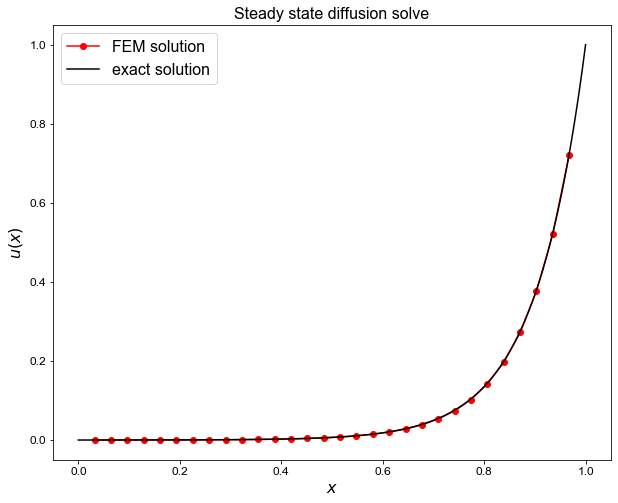

In [195]:
def f(x):
    return 0.0

def u_exact(x):
    global CE, Pe, L
    return CE * (np.exp(Pe *x / L)-1) / (np.exp(Pe) - 1)

def steady_adv_dif(Ns):
    N_elements_CG = Ns
    N_nodes_CG = N_elements_CG + 1

    x_nodes = np.linspace(0, 1 , N_nodes_CG )
    dx = np.diff(x_nodes)
    # create matrix to store the discretisaton matrix
    K = np.zeros((N_nodes_CG, N_nodes_CG))
    # create matrix to store the RHS
    RHS = np.zeros(N_nodes_CG - 2)

  
    K = np.diag(1. / dx[:-1]  +  1. / dx[1:], k=0) \
        - np.diag(1. / dx[1:-1] + 0.5 *Pe, k=-1) \
        - np.diag(1. / dx[1:-1] - 0.5 * Pe, k=1)

    # form RHS vector by integrating function f multiplied by basis function
    # loop over internal nodes
    for node in range(1, N_nodes_CG - 1):
        # and integrate our function multiplied by the corresponding cts basis function  
        phi_i = hat_function(node, x_nodes)
        integrand = lambda x : f(x) * phi_i(x)
        # simpsons with number intervals = 2 can integrate this exactly
        RHS[node-1] = simpsons_rule(x_nodes[node-1], x_nodes[node+1], integrand, 2 )

    # Add in the extra entries due to the inhomogeneous BCs
    # Here we can use the equation obtained above for RHS to implement function
    RHS[0] = (uL * 1/dx[0] ) + (uL * Pe) * 0.5  # use condition b[1]
    RHS[-1] = uR * 1/dx[-1] - (uR * Pe) * 0.5   # use condition b[n-1]

    u = sl.solve(K, RHS)
    
    return u, x_nodes

u, x_nodes = steady_adv_dif(31)
x_fine = np.linspace(0, L, 1000)

fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)

ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Steady state diffusion solve', fontsize=16)
ax1.plot(x_nodes[1:-1], u, 'or-', label='FEM solution')
ax1.plot(x_fine, u_exact(x_fine), 'k-', label='exact solution')
ax1.legend(loc='best', fontsize=16);

print('error (RMS at nodes only) = ', sl.norm(u - u_exact(x_nodes[1:-1]) )/np.sqrt(len(u)) )

**Comments: The figure shown above indicates the performance of FEM solution is very similar to exact solution. Meanwhile, it has extremely small error difference at selected points**

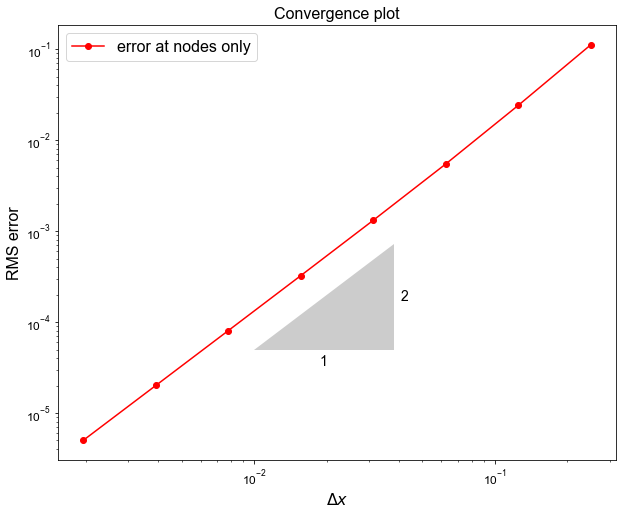

In [196]:
# some meshes of increasingly finer resolution to loop over
N_s = [2**p for p in range(2, 10)]
errors = np.zeros((1,len(N_s)))

for i, N in enumerate(N_s):
    u, x_nodes = steady_adv_dif(N)
    # RMS error of the nodal errors - cf. comments in main lecture text
    errors[0,i] = sl.norm(u - u_exact(x_nodes[1:-1])) / np.sqrt(len(u)) 
    
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('Convergence plot', fontsize=16)
ax1.loglog(1./np.array(N_s), errors[0,:], 'or-', label='error at nodes only')
ax1.legend(loc='best', fontsize=16)
annotation.slope_marker((1e-2, 5e-5), (2, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))
    

***Comments: According to the convergence plot, the figure indicates the range of RMS error is about from 1 to $10^{-6}$ as the value of dx increases and the order of convergence is 2.***

Finally, compare the errors in your solution against a corresponding finite difference solver. You may re-use code from lecture 7 for this. What do you observe?

error (RMS) =  0.000986559025932779


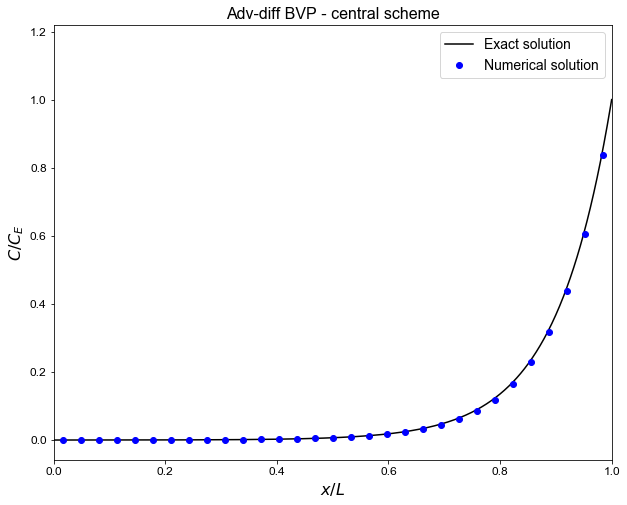

In [197]:
# we use finite difference solver based on codes in lecture 7
def BVP_AD_central(L, U, kappa, CE, N):
    """ function to assemble and solve the AD BVP problem
    using central differences for both adv and diff.
    
    Returns the mesh x and the solution C
    """
    dx = L / N
    x = np.linspace(-dx / 2, dx / 2 + L, N + 2)
    A = np.zeros((N + 2, N + 2))
    b = np.zeros((N + 2))
    # interior points
    r_diff = kappa / dx**2
    r_adv = 0.5 * U / dx
    for i in range(1, N + 1):
        A[i, i - 1] = r_diff + r_adv
        A[i, i] = -2 * r_diff
        A[i, i + 1] = r_diff - r_adv
        b[i] = 0
    # BC1
    A[0, 0] = 0.5
    A[0, 1] = 0.5
    b[0] = 0
    # BC2
    A[N + 1, N] = 0.5
    A[N + 1, N + 1] = 0.5
    b[N + 1] = CE  # BC2
    # invert matrix
    C = np.linalg.solve(A, b)
    return x, C

# call function to generate numerical solution
x, C = BVP_AD_central(L, U, kappa, CE, 31)

# construct the exact solution
xf = np.linspace(0, L, 1000)
Cex = u_exact(xf)


# set up figure
fig = plt.figure(figsize=(10, 8))
ax1 = plt.subplot(111)
ax1.plot(xf, Cex, '-k', label='Exact solution')
ax1.plot(x, C, 'ob', label='Numerical solution')
ax1.set_xlabel('$x/L$', fontsize=16)
ax1.set_ylabel('$C/C_E$', fontsize=16)
ax1.set_title('Adv-diff BVP - central scheme', fontsize=16)
ax1.legend(loc='best', fontsize=14)

# to exclude ghost points just restrict the x limit of the plot
ax1.set_xlim(0, 1);
print('error (RMS) = ',sl.norm(C[1:-1] - u_exact(x[1:-1]))/np.sqrt(len(u)) )



***Comments: Comparing the error results between Numerical solution (RMS error = 0.000986559025932779 ) and FEM solution (RMS error = 0.0014043523172788935), FEM solution has a more precise performance.***

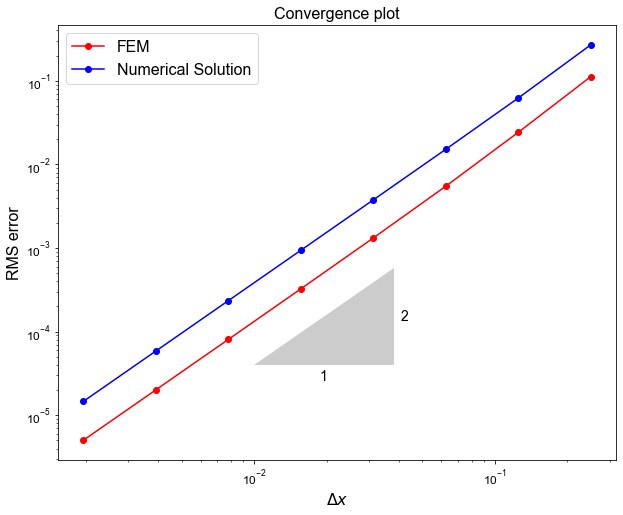

In [198]:
# some meshes of increasingly finer resolution to loop over
N_s = [2**p for p in range(2, 10)]
errors = np.zeros((2,len(N_s)))

for i, N in enumerate(N_s):
    u, x_nodes = steady_adv_dif(N)
    x, C = BVP_AD_central(L, U, kappa, CE, N)
    # RMS error of the nodal errors
    errors[0,i] = sl.norm(u - u_exact(x_nodes[1:-1])) / np.sqrt(len(u)) 
    errors[1,i] = sl.norm(C[1:-1] - u_exact(x[1:-1])) / np.sqrt(len(C[1:-1])) 
    
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$\Delta x$', fontsize=16)
ax1.set_ylabel('RMS error', fontsize=16)
ax1.set_title('Convergence plot', fontsize=16)
ax1.loglog(1./np.array(N_s), errors[0,:], 'ro-', label='FEM')
ax1.loglog(1./np.array(N_s), errors[1,:], 'bo-', label='Numerical Solution')
ax1.legend(loc='best', fontsize=16)
annotation.slope_marker((1e-2, 4e-5), (2, 1), ax=ax1,
                        size_frac=0.25, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

***Comments: As the figure shown above, both convergences of FEM and Numerical solution are second order accurate.***

# Coursework Q4 - Time-dependent advection-diffusion with the FEM

In this part of the question we want to solve unsteady advection-diffusion.

This time base your solution on the 1D (local) assembly based finite element solver we implemented in lecture 12 and generalise it to include advection.

Test your implementation using the same advection-diffusion of a Gaussian problem considered in
lecture 8 homework question 2 "An analytical solution to advection-diffusion" where I explained and demonstrated how an appropriate Gaussian function can be considered as an exact solution to the advection-diffusion problem as long as we initialise our solution with the Gaussian evaluated at some $t>0$  (since in the limit of  $t=0$   the solution is a Dirac-delta function), and use that same offset in time for the purpose of comparing the analytical solution with the numerical solution you obtain.


```python
def adv_diff_analytical_solution(U, kappa, x0, x, t):
    """ Analtical solution to advection-diffusion for an assumed 
    Dirac-delta initial condition at t=0.
    """
    return np.exp( -((x-x0) - U*t)**2 / (4.*kappa*t)) / np.sqrt(4. * np.pi * kappa * t)
```


We can then use the same function evaluated at the appropriate time as an exact solution to compare our numerical method against.
For this question you can consider the (non-periodic) domain $x\in[0,3]$ and you can assume homogeneous Neumann boundary conditions. Initialise the problem using the analytical solution centred initially at $x=0.5$ with an initial time for the purposes of evaluating the Gaussian function of $t=0.05$. Assume a velocity of 1 and a diffusivity of 0.01. Integrate the problem for a total time period of 1 [NB. I've purposefully set these values and the size of the domain so you don't need to worry about your Gaussian getting close to a boundary].

Perform some experiments with different $\Delta x$ and $\Delta t$ values such that you can demonstrate the expected order of convergence in space and in time (for the time-stepping options of forward Euler, backward Euler and Crank-Nicolson). To do this I suggest you fix one of $\Delta x$ or $\Delta t$ and vary the other independently.

## Analysis

Based on the lecture 7, time-dependent advection-diffusion in one-dimension(1D) can be written in following form 

$$\frac{\partial u}{\partial t} + U\frac{\partial u}{\partial x}= \kappa\frac{\partial^2 u}{\partial x^2}, $$

and assuming for simplicity that the diffusivity $\kappa$ and prescribed velocity $U$ are constant.

The weak/variational form of this problem can be written as (ignoring boundary terms)

$$ \int_I \,\frac{\partial u}{\partial t}\,v\,dx + \kappa\int_I \,u'\,v'\,dx  - U\int_I \,u\,v'\,dx\,= 0, \;\;\;\;\forall \;\; v\in V.$$

Substituting in our approximate solution function 

$$ u_h:= \sum_{j=0}^{n} u_j\,\phi_j,$$

and restricting the test functions to the appropriate finite-dimensional space ($v\in V_h$ with a basis given by $\phi_i$) yields the discrete system


$$\sum_{j=0}^{n} \,\frac{\partial u_j}{\partial t}\, \int_0^1 \phi_j\, \phi_i \,dx  +  \kappa\sum_{j=0}^{n} u_j\, \int_0^1 \phi_j'\, \phi_i' \,dx - U\sum_{j=0}^{n} u_j\, \int_0^1 \phi_j\, \phi_i' \,dx = 0\;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n $$

Then we can further simplify the formula by using:

$$\sum_{j=0}^{n} \,\frac{d u_j}{d t} M_{ij} + \kappa\sum_{j=0}^{n} u_j\, K_{ij} - U\sum_{j=0}^{n} u_j\, D_{ij} = 0, \;\;\;\;\; \text{for}\;\;\;\; i = 0, 1,\ldots, n.$$
 
To discretise in time we replace the time derivative with a finite difference approximation.

Suppose we want to implement the "theta" method (to give us the flexibility to choose forward Euler, backward Euler or Crank-Nicolson), then we have to consider the system


$$
M \,\frac{\boldsymbol{u}^{n+1} - \boldsymbol{u}^{n}}{\Delta t} + (\kappa\, K-UD)\left(\theta \boldsymbol{u}^{n+1} + (1-\theta)\boldsymbol{u}^{n}\right) = \boldsymbol{0},
$$

which can be rearranged to 

$$ \left( M + \theta\,\Delta t \,(\kappa\, K-UD) \right)  \boldsymbol{u}^{n+1} = \left( M - (1-\theta)\, \Delta t \,(\kappa\, K-UD) \right) \boldsymbol{u}^{n}.$$

In [199]:
def generate_1D_CG_mesh(Lx, N_elements_CG, mesh_option=0):
    """ Function to generate a mesh given the domain size Lx
    (we assume the left hand entry is always at zero).
    
    Use N_elements_CG number of element.
    
    mesh_option==0 corresponds to a uniform mesh - only option implemented so far.
    
    Returns: the node locations x_node and the mesh spacing dx
    """
    if(mesh_option==0):
        x_nodes = np.linspace(0, Lx ,N_elements_CG+1)
    else:
        raise Exception('mesh_option != 0 not implemented yet')
    # given the mesh compute an array of element sizes
    dx = np.diff(x_nodes)
    return x_nodes, dx

def connectivity(N_loc, N_elements_CG):
    """ Generate the connectivity matrix of dimension N_loc * N_elements_CG.
    
    Row corresponds to the local node number, column to the element number,
    the entry of the matrix is then a global node number.
    
    Returns: the connectivity matrix
    """
    connectivity_matrix = np.zeros((N_loc, N_elements_CG), dtype=int)
    if(N_loc==2):
        for element in range (N_elements_CG):
            connectivity_matrix[0, element] = element
            connectivity_matrix[1, element] = element + 1
    else:
        raise Exception('Only linear element (N_loc=2) implemented.')
    return connectivity_matrix
def shape(N_loc, N_gi):
    """ Define reference shape functions - their values at N_gi quadrature points.
    
    Only implemented for N_loc = 2, i.e. two nodes per element - linear basis functions.
    """ 
    assert(N_loc==2)
    phi = np.zeros( (N_loc, N_gi) )
    if(N_gi==2):
        phi[0,0] = 1.0 
        phi[0,1] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 1.0
    elif(N_gi==3):
        phi[0,0] = 1.0 
        phi[0,1] = 0.5 
        phi[0,2] = 0.0 
        phi[1,0] = 0.0 
        phi[1,1] = 0.5 
        phi[1,2] = 1.0        
    else:
        raise Exception('N_gi value not implemented.')
    return phi

def shape_derivatives(element, dx, N_loc, N_gi):
    """ Define derivatives of shape functions - their values at N_gi quadrature points
    over the reference element.
    
    Only implemented for N_loc = 2, i.e. two nodes per element - 
    linear basis functions.
    """   
    assert(N_loc==2)
    phi_x = np.zeros( (N_loc, N_gi) )
    # the derivatives of our linear basis functions over the reference element
    if(N_gi==2):
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] =  phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0]  
        phi_x[1,1] =  phi_x[1,0]
    elif(N_gi==3):
        phi_x[0,0] = -1. / 2.
        phi_x[0,1] = phi_x[0,0] 
        phi_x[0,2] = phi_x[0,0] 
        phi_x[1,0] = -phi_x[0,0] 
        phi_x[1,1] = phi_x[1,0] 
        phi_x[1,2] = phi_x[1,0]            
    else:
        raise Exception('N_gi value not implemented.')
    # Jacobian contribution as seen/explained above due to the use of the chain rule
    phi_x = phi_x * (2. / dx[element]) 
    return phi_x

In [200]:
def quadrature(N_gi):
    """ Define quadrature rule on N_gi quadrature points.
    """    
    weight = np.zeros(N_gi)
    if(N_gi==2):  # Trapezoidal rule in 1D
        weight[0] = 0.5 
        weight[1] = 0.5
    elif(N_gi==3): # Simpson's rule in 1D
        weight[0] = 1. / 6. 
        weight[1] = 2. / 3. 
        weight[2] = 1. / 6.
    else:
        raise Exception('N_gi value not implemented.')
    return weight
def assembly_local(M, K, D, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx):
    """ Perform local assembly by looping over products of the local node numbers 
    (i.e. products of local basis functions), computing the required integrals, and 
    adding contributions to the correct locations of the global discretisation matrices.
    As we are solving the Diffusion problem we know we need the mass matrix M, and the 
    diffusion discretisation matrix K.  The current version of M and K are passed in here
    and the local contribitions added in to them.
    """
    for i_loc in range(N_loc):
        i_global = connectivity_matrix[i_loc, element]
        for j_loc in range(N_loc):
            j_global = connectivity_matrix[j_loc, element]
            # perform the quadrature - over one element with one "quadrature interval"
            # "weight" is the quadrature weight, e.g. 1/6, 4/6, 1/6 for Simpson's rule
            # and we need to remember to include the Jacobian determinant
            phi_phi = 0.
            phix_phix = 0.
            phi_phix = 0.
            for gi in range(N_gi):
                phi_phi += weight[gi] * phi[i_loc, gi] * phi[j_loc, gi] * 0.5*dx[element] 
                phix_phix += weight[gi] * phi_x[i_loc, gi] * phi_x[j_loc, gi] * 0.5*dx[element]
                phi_phix += weight[gi] * phi_x[i_loc, gi] * phi[j_loc, gi] * 0.5*dx[element]
            M[i_global, j_global] = M[i_global, j_global] + phi_phi 
            K[i_global, j_global] = K[i_global, j_global] + phix_phix
            D[i_global, j_global] = D[i_global, j_global] + phi_phix  
            
            
def assembly_global(M, K, D, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx):
    """ Perform global assembly by looping over elements.
    """
    # loop over all elements
    for element in range(N_elements_CG):
        # compute the derivatives of the basis function on this element
        phi_x = shape_derivatives(element, dx, N_loc, N_gi)
        # perform local assembly and update the M and K matrices
        assembly_local(M, K, D, element, connectivity_matrix, N_loc, N_gi, weight, phi, phi_x, dx)

In [201]:
def apply_bcs(A, b, lbc, rbc, bc_option=0):
    """Apply BCs using a big spring method.
    
    bc_option==0 Homogeneous Neumann
    bc_option==1 inhomogeneous Dirichlet
    """
    if(bc_option==0):
        return
    elif(bc_option==1):
        big_spring = 1.0e10
        A[0,0] = big_spring            
        b[0]   = big_spring * lbc
        A[-1,-1] = big_spring            
        b[-1]   = big_spring * rbc         
    else:
        raise Exception('bc option not implemented')
        
def adv_diff_analytical_solution(x, U, kappa, x0, t):
    """ Analtical solution to advection-diffusion for an assumed 
    Dirac-delta initial condition at t=0.
    """
    return np.exp( -((x-x0) - U*t)**2 / (4.*kappa*t)) / np.sqrt(4. * np.pi * kappa * t)

def initial_condition(U, kappa, x0, x, t, IC_option=0):
    """ Function to define an initial condition on our mesh.
    """
    if(IC_option==0):
        return adv_diff_analytical_solution(U, kappa, x0, x, t)
    else:
        raise Exception('Option not implemented.')  

In [202]:
def unsteady_adv_Diff_fem(Lx, kappa, N_nodes_CG, dt, t_start, t_end, U, x0, theta):
    # mesh data
    N_elements_CG = N_nodes_CG - 1
    
    # define some numerical parameters
    N_loc = 2
    N_gi = 3
    
    # generate mesh
    x_nodes, dx = generate_1D_CG_mesh(Lx, N_elements_CG)
    connectivity_matrix = connectivity(N_loc, N_elements_CG)
    
    # time stepping
    t = t_start
    u_ic = initial_condition(x_nodes, U, kappa, x0, t)
 
    # set-up things we need for our discretisation
    # the basis functions defined on our reference element
    phi = shape(N_loc, N_gi)

    # quadrature weights
    weight = quadrature(N_gi)
    
    # allocate space to store our discretisation matrices
    M = np.zeros((N_nodes_CG, N_nodes_CG))
    K = np.zeros((N_nodes_CG, N_nodes_CG))
    D = np.zeros((N_nodes_CG, N_nodes_CG))

    # assemble the individual discretisation matrices
    assembly_global(M, K, D, N_elements_CG, connectivity_matrix, N_loc, N_gi, weight, phi, dx)

    # and combine them into our final matrix system
    A = M + dt*theta*(kappa*K - U*D)
    RHS_matrix = M - (1-theta)*dt*(kappa*K - U*D)
    
    # and finally time step
    u_old = np.copy(u_ic)
    while t<t_end:
        b = RHS_matrix @ u_old.T 
        apply_bcs(A, b, 0, 0, bc_option=0)
        u = sl.solve(A, b)
        u_old = np.copy(u)
        t += dt
    return u, u_ic, x_nodes

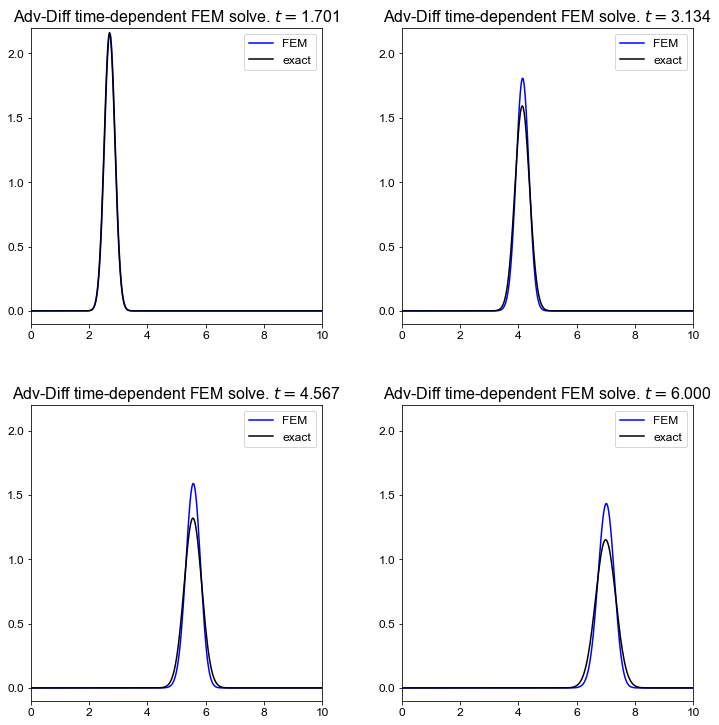

In [203]:
U = 1
kappa = 0.01
N = 301
Lx = 10
dx = Lx / N
dt = 0.01
t_START = 1.7
t_END = np.linspace(1.701, 6, 4)
x0 = 1.0


fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.reshape(-1)
fig.tight_layout(w_pad=4, h_pad=5)


for i, t in enumerate(t_END):
    u, u_ic, x_nodes = unsteady_adv_Diff_fem(Lx, kappa, N, dt, t_START, t, U, x0, theta = 0.0)
    u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t)
    axs[i].plot(x_nodes, u,'b-', label='FEM')
    axs[i].plot(x_nodes, u_exact,'k-', label='exact')
    axs[i].legend(loc='best')
    axs[i].set_xlim(0.0, 10.0)
    axs[i].set_ylim(-0.1, 2.2)
    axs[i].set_title('Adv-Diff time-dependent FEM solve. $t=${0:.3f}'.format(t), fontsize=16)
    

***Comments: Based on the four figures obtained above, FEM can be used to solve the unsteady advection-diffusion problem. However, the error between FEM solution and exact solution increases as the time increases.***

We can then use the same function evaluated at the appropriate time as an exact solution to compare our numerical method against.
For this question you can consider the (non-periodic) domain $x\in[0,3]$ and you can assume homogeneous Neumann boundary conditions. Initialise the problem using the analytical solution centred initially at $x=0.5$ with an initial time for the purposes of evaluating the Gaussian function of $t=0.05$. Assume a velocity of 1 and a diffusivity of 0.01. Integrate the problem for a total time period of 1 [NB. I've purposefully set these values and the size of the domain so you don't need to worry about your Gaussian getting close to a boundary].


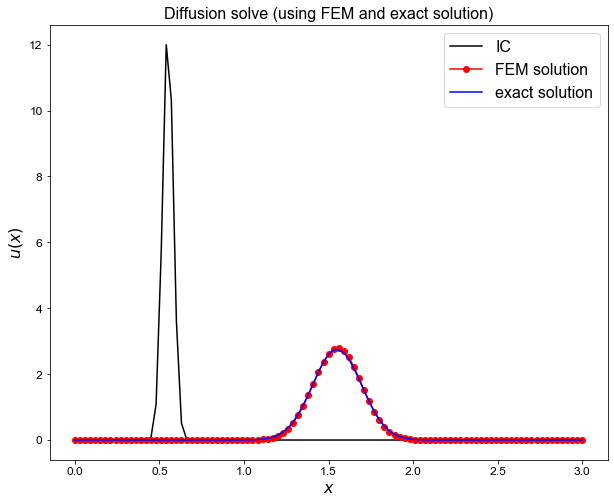

In [204]:
#initialize parameters based on requirements
Lx = 3
x0 = 0.5
t_START = 0.05
t_END = 1.05
U = 1
kappa = 0.01
N = 101
dx = Lx / N
dt = 0.001
x0 = 0.5

u, u_ic, x_nodes = unsteady_adv_Diff_fem(Lx, kappa, N, dt, t_START, t_END, U, x0, theta = 0.0)
u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_END)
       
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)
ax1.set_xlabel('$x$', fontsize=16)
ax1.set_ylabel('$u(x)$', fontsize=16)
ax1.set_title('Diffusion solve (using FEM and exact solution)', fontsize=16)
ax1.plot(x_nodes, u_ic, 'k-', label='IC')
ax1.plot(x_nodes, u, 'ro-', label='FEM solution')
ax1.plot(x_nodes, u_exact,'b-', label='exact solution')
ax1.legend(loc='best', fontsize=16);

***Comments: In the figure, IC (black line) indicates the initial condition. Moreover, the performance between FEM and exact solution are quite close.***

Perform some experiments with different $\Delta x$ and $\Delta t$ values such that you can demonstrate the expected order of convergence in space and in time (for the time-stepping options of forward Euler, backward Euler and Crank-Nicolson). To do this I suggest you fix one of $\Delta x$ or $\Delta t$ and vary the other independently.

## Analysis
According to the formula we obtained at first:

$$
M \,\frac{\boldsymbol{u}^{n+1} - \boldsymbol{u}^{n}}{\Delta t} + (\kappa\, K-UD)\left(\theta \boldsymbol{u}^{n+1} + (1-\theta)\boldsymbol{u}^{n}\right) = \boldsymbol{0},
$$
The "theta" method gives us the flexibility to choose forward Euler, backward Euler and Crank-Nicolson, then we have to consider the system


**Forward Euler:**
$\theta$ is set to be 0 
$$
\frac{\boldsymbol{u}^{n+1} - \boldsymbol{u}^{n}}{\Delta t} = Z\boldsymbol{u}^{n}\;\; \quad where \; Z =M^{-1}(\kappa\, K-UD) 
$$

**Backward Euler:**
$\theta$ is set to be 1
$$
\frac{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}{\Delta t} = Z\boldsymbol{c}^{n+1}\;\; \quad where \; Z =M^{-1}(\kappa\, K-UD) 
$$

**Crank-Nicolsan:**
$\theta$ is set to be 0.5 
$$ \frac{\boldsymbol{c}^{n+1} - \boldsymbol{c}^{n}}{\Delta t} = 0.5 Z\left(\boldsymbol{c}^{n+1} + \boldsymbol{c}^{n}\right)\;\;   \quad where \; Z =M^{-1}(\kappa\, K-UD) $$


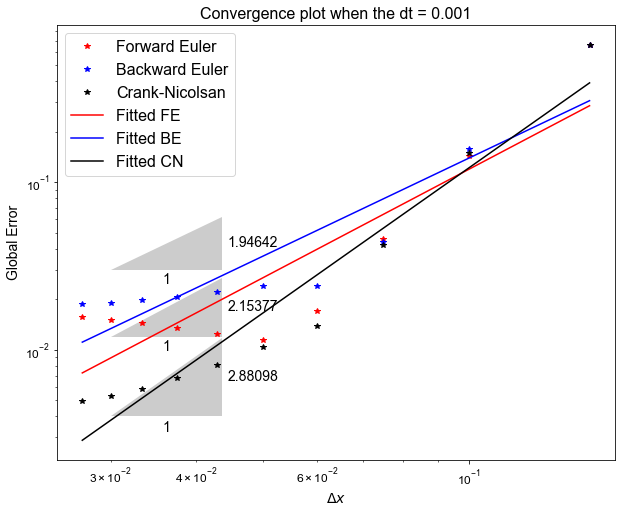

In [205]:
U = 1.
kappa = 0.01
Lx = 3.
N_S = np.arange(20, 120, 10)
err = np.zeros((3,len(N_S)))
dt = 0.001
t_START = 0.05
t_END = 1.05
x0=0.5

for i, N in enumerate (N_S):
    # Forward Euler
    u, u_ic, x_nodes = unsteady_adv_Diff_fem(Lx, kappa, N, dt, t_START, t_END, U, x0, theta = 0.0)
    u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_END)
    err[0,i] = sl.norm(u - u_exact) / np.sqrt(len(u))

    # Backward Euler
    u, u_ic, x_nodes = unsteady_adv_Diff_fem(Lx, kappa, N, dt, t_START, t_END, U, x0, theta = 1.0)
    u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_END)
    err[1,i] = sl.norm(u - u_exact) / np.sqrt(len(u))
    
    # Crank-Nicolsan
    u, u_ic, x_nodes = unsteady_adv_Diff_fem(Lx, kappa, N, dt, t_START, t_END, U, x0, theta = 0.5)
    u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_END)
    err[2,i] = sl.norm(u - u_exact) / np.sqrt(len(u))


fig = plt.figure(figsize=(10, 8))
ax1 = plt.subplot(111)
ax1.set_xlabel('$\Delta x$', fontsize = 14)
ax1.set_ylabel('Global Error', fontsize = 14)
ax1.set_title('Convergence plot when the dt = {:}'. format(dt), fontsize = 16)


ax1.loglog(Lx/np.array(N_S), err[0,:], 'r*', label = 'Forward Euler')
ax1.loglog(Lx/np.array(N_S), err[1,:], 'b*', label = 'Backward Euler')
ax1.loglog(Lx/np.array(N_S), err[2,:], 'k*', label = 'Crank-Nicolsan')

line_fit_fe = np.polyfit(np.log(Lx/np.array(N_S)), np.log(err[0,:]), 1)
line_fit_be = np.polyfit(np.log(Lx/np.array(N_S)), np.log(err[1,:]), 1)
line_fit_cn = np.polyfit(np.log(Lx/np.array(N_S)), np.log(err[2,:]), 1)

ax1.loglog(Lx/np.array(N_S), np.exp(line_fit_fe[1]) * (Lx/np.array(N_S))**(line_fit_fe[0]),'r-', label="Fitted FE")
ax1.loglog(Lx/np.array(N_S), np.exp(line_fit_be[1]) * (Lx/np.array(N_S))**(line_fit_be[0]),'b-', label="Fitted BE")
ax1.loglog(Lx/np.array(N_S), np.exp(line_fit_cn[1]) * (Lx/np.array(N_S))**(line_fit_cn[0]),'k-',label="Fitted CN")

y1 = np.exp(line_fit_fe[1]) * (Lx/np.array(N_S))**(line_fit_fe[0])
slope1 = round((np.log(y1[-1]) - np.log(y1[-2]))/(np.log(Lx/np.array(N_S)[-1]) - np.log(Lx/np.array(N_S)[-2])), 5)
annotation.slope_marker((3e-2, 12e-3), (slope1, 1), ax=ax1,
                        size_frac=0.2, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

y2 = np.exp(line_fit_be[1]) * (Lx/np.array(N_S))**(line_fit_be[0])
slope2 = round((np.log(y2[-1]) - np.log(y2[-2]))/(np.log(Lx/np.array(N_S)[-1]) - np.log(Lx/np.array(N_S)[-2])), 5)
annotation.slope_marker((3e-2, 3e-2), (slope2, 1), ax=ax1,
                        size_frac=0.2, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

y3 = np.exp(line_fit_cn[1]) * (Lx/np.array(N_S))**(line_fit_cn[0])
slope3 = round((np.log(y3[-1]) - np.log(y3[-2]))/(np.log(Lx/np.array(N_S)[-1]) - np.log(Lx/np.array(N_S)[-2])), 5)
annotation.slope_marker((3e-2, 4e-3), (slope3, 1), ax=ax1,
                        size_frac=0.2, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

ax1.legend(loc='best', fontsize=16);

***Comments: As figure shown above, the Crank-Nicolsan has better error performance with in varying $\Delta x$, which 
shows positive correlation between $\Delta x$ and error performance and the order of convergence is close to 3. However, both forward Euler and backward Euler do not have strong positive correlation between $\Delta x$ and error performance and their convergence order are close to 2.*** 

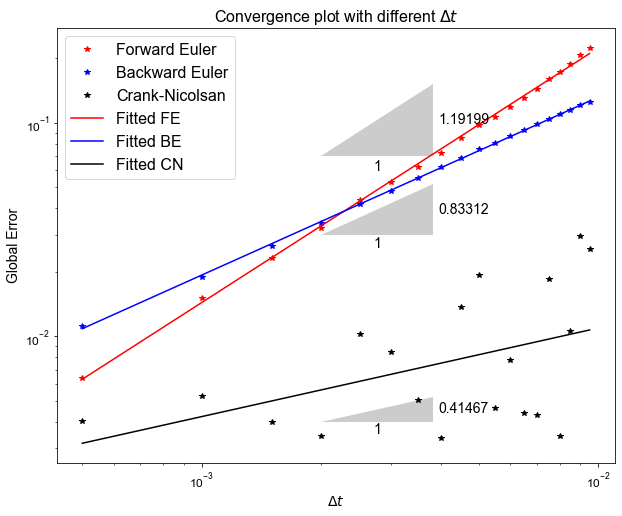

In [207]:
U = 1.
kappa = 0.01
Lx = 3.
N = 101
t_s = np.arange(0.0005, 0.01, 0.0005)
err = np.zeros((3,len(t_s)))
t_START = 0.05
t_END = 1.05
x0=0.5


for i, dt in enumerate (t_s):
    # Forward Euler
    u, u_ic, x_nodes = unsteady_adv_Diff_fem(Lx, kappa, N, dt, t_START, t_END, U, x0, theta = 0.0)
    u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_END)
    err[0,i] = sl.norm(u - u_exact) / np.sqrt(len(u))

    # Backward Euler
    u, u_ic, x_nodes = unsteady_adv_Diff_fem(Lx, kappa, N, dt, t_START, t_END, U, x0, theta = 1.0)
    u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_END)
    err[1,i] = sl.norm(u - u_exact) / np.sqrt(len(u))
    
    # Crank-Nicolsan
    u, u_ic, x_nodes = unsteady_adv_Diff_fem(Lx, kappa, N, dt, t_START, t_END, U, x0, theta = 0.5)
    u_exact = adv_diff_analytical_solution(x_nodes, U, kappa, x0, t_END)
    err[2,i] = sl.norm(u - u_exact) / np.sqrt(len(u))


fig = plt.figure(figsize=(10, 8))
ax1 = plt.subplot(111)
ax1.set_xlabel(r'$\Delta t$', fontsize = 14)
ax1.set_ylabel('Global Error', fontsize = 14)
ax1.set_title('Convergence plot with different $\Delta t$'. format(dt), fontsize = 16)


ax1.loglog(t_s, err[0,:], 'r*', label = 'Forward Euler')
ax1.loglog(t_s, err[1,:], 'b*', label = 'Backward Euler')
ax1.loglog(t_s, err[2,:], 'k*', label = 'Crank-Nicolsan')

line_fit_fe = np.polyfit(np.log(t_s), np.log(err[0,:]), 1)
line_fit_be = np.polyfit(np.log(t_s), np.log(err[1,:]), 1)
line_fit_cn = np.polyfit(np.log(t_s), np.log(err[2,:]), 1)

ax1.loglog(t_s, np.exp(line_fit_fe[1]) * (t_s)**(line_fit_fe[0]),'r-', label="Fitted FE")
ax1.loglog(t_s, np.exp(line_fit_be[1]) * (t_s)**(line_fit_be[0]),'b-', label="Fitted BE")
ax1.loglog(t_s, np.exp(line_fit_cn[1]) * (t_s)**(line_fit_cn[0]),'k-',label="Fitted CN")

y1 = np.exp(line_fit_fe[1]) * (t_s)**(line_fit_fe[0])
slope1 = round((np.log(y1[-1]) - np.log(y1[-2]))/(np.log(t_s[-1]) - np.log(t_s[-2])), 5)
annotation.slope_marker((2e-3, 7e-2), (slope1, 1), ax=ax1,
                        size_frac=0.2, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

y2 = np.exp(line_fit_be[1]) * (t_s)**(line_fit_be[0])
slope2 = round((np.log(y2[-1]) - np.log(y2[-2]))/(np.log(t_s[-1]) - np.log(t_s[-2])), 5)
annotation.slope_marker((2e-3, 3e-2), (slope2, 1), ax=ax1,
                        size_frac=0.2, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

y3 = np.exp(line_fit_cn[1]) * (t_s)**(line_fit_cn[0])
slope3 = round((np.log(y3[-1]) - np.log(y3[-2]))/(np.log(t_s[-1]) - np.log(t_s[-2])), 5)
annotation.slope_marker((2e-3, 4e-3), (slope3, 1), ax=ax1,
                        size_frac=0.2, pad_frac=0.05, text_kwargs = dict(fontsize = 14))

ax1.legend(loc='best', fontsize=16);

***Comments: As figure shown above, when $\Delta t$ increases from 0.0005 to 0.1, Crank-Nicolsan has lowest error compared to forward Euler and backward Euler. Both forward Euler and backward Euler show good linearity and the order of convergence are close to 1. However, the stability of Crank-Nicolsan is not good and its convergence order is close to 0.5.***